Cell 1 (imports + DB connection)

In [5]:
from pathlib import Path

import sqlite3

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

project_root = Path.cwd().parent

db_path = project_root / "data" / "Synthetic Dataset" / "product_analytics.db"

conn = sqlite3.connect(db_path)

Cell 2 (time series revenue "PnL curve")

In [6]:
query = """ 

SELECT

    DATE(order_ts) AS day,

    SUM(net_revenue) AS revenue

FROM orders

GROUP BY day

ORDER BY day;
 
"""

daily = pd.read_sql_query(query, conn)

daily["day"] = pd.to_datetime(daily["day"])

daily.head()

,day,revenue
0,2024-01-01,1422.22
1,2024-01-02,1456.57
2,2024-01-03,1459.21
3,2024-01-04,2009.31
4,2024-01-05,1429.87


Cell 3 (daily changes)

In [7]:
daily["daily_change"] = daily["revenue"].diff()

daily.dropna(inplace=True)

daily.describe()

,day,revenue,daily_change
count,729,729.000000,729.000000
mean,2024-12-31 00:00:00,1904.329781,-0.667160
min,2024-01-02 00:00:00,352.050000,-2724.110000
25%,2024-07-02 00:00:00,1463.250000,-576.260000
50%,2024-12-31 00:00:00,1863.620000,2.640000
75%,2025-07-01 00:00:00,2311.930000,585.120000
max,2025-12-30 00:00:00,3797.740000,2758.660000
std,NaN,618.307500,873.450334


Cell 4 (volatility)

In [8]:
volatility = daily["daily_change"].std()

volatility

np.float64(873.4503341878619)

Cell 5 (rolling volatility)

In [9]:
daily["rolling_vol_14"] = daily["daily_change"].rolling(14).std()

daily["rolling_vol_30"] = daily["daily_change"].rolling(30).std()

daily.tail()

,day,revenue,daily_change,rolling_vol_14,rolling_vol_30
725,2025-12-26,1984.53,404.87,907.985756,1091.991475
726,2025-12-27,3172.02,1187.49,946.382737,1110.364891
727,2025-12-28,1850.50,-1321.52,1021.183750,1075.048946
728,2025-12-29,2913.38,1062.88,1038.225908,1091.212197
729,2025-12-30,935.86,-1977.52,1056.668131,1127.704390


Cell 6 (visualization)

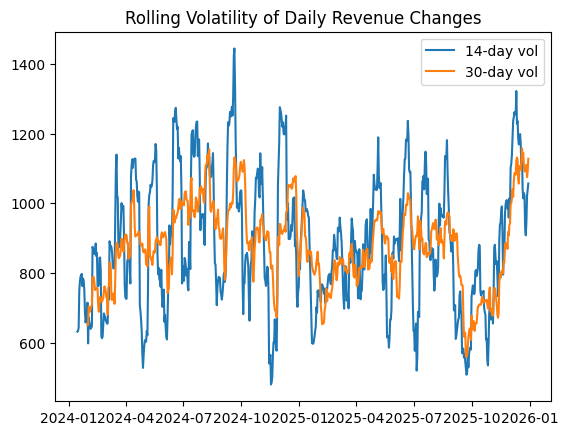

In [10]:
plt.figure()

plt.plot(daily["day"], daily["rolling_vol_14"], label = "14-day vol")

plt.plot(daily["day"], daily["rolling_vol_30"], label = "30-day vol")

plt.title("Rolling Volatility of Daily Revenue Changes")

plt.legend()

plt.show()

"Volatility Clustering - A core financial concept.

Cell 7 (sharpe intuition)

In [ ]:
mean_change = daily["daily_change"].mean()

sharpe_like = mean_change / volatility

mean_change, 

volatility, 

sharpe_like